## Intelligent Systems SIN 2025/26, lab group 3E1 (subgroup **2**)
## **A1**. Block 1 lab exam (1.25 points). **TIME: 45 min**.
## 12 November 2025

### **Name of the student**: Adrià Marín Bayarri


In the **n-puzzle problem**, the heuristics "Manhattan distance", "linear conflicts (LC)" and "misplaced tiles (MT)" for the A* algorithm that we saw in our SIN lessons are **admissible** heuristics, since they all underestimate the cost in movements of the actual optimal solution to reach the goal state. The additive combination "Manhattan distance + linear conflicts" is well known as remaining an admissible heuristic while at the same time better approximating the actual cost of the optimal solution, thus better informing the search to make it more efficient in terms of time cost and space cost.

We want to explore the alternative combined heuristic "Manhattan distance + misplaced tiles", and the effect of trying modified heuristics increasing or decreasing the cost estimation, and to analyse:
- Whether the modified heuristics are admissible or non-admissible.
- Whether the modified heuristics better inform the A* search to make it more efficient in terms of time cost and space cost.

**Exam set-up**:
- Make sure that your notebook has access to the auxiliary code file **search.py** provided for lab assignment 1.
- You can copy and use here anything you have from the notebooks you personally worked on for lab assignment 1.
- Remember to execute every code cell in order, since the code cells below will make use of the imports and method definitions above.

#### Preliminary code cells:
Run these cells first of all. **Do not modify** anything here.

In [1]:
pip install matplotlib tabulate numpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import search
from search import *

import math  # In case you want to use math.sqrt() or other math functions
import statistics  # For statistical comparisons in exercise 2 ( statistics.mean() )

### **Exercise 1 (code)**

**Implement in the code cell below these modified heuristics**:
1. manhattan_plus_mt: Addition of the cost estimations of "Manhattan distance" and "misplaced tiles" (mahattan_distance + misplaced_tiles).
1. manhattan_plus_mt_half: Half the cost estimation of "Manhattan distance + misplaced tiles" (0.5 * manhattan_plus_mt).
1. manhattan_plus_mt_double: Twice the cost estimation of "Manhattan distance + misplaced tiles" (2 * manhattan_plus_mt).

**Notes**:
- Manhattan distance: You can directly call the method *getManhattanDistance(state, end_state)* from the auxiliary code file *search.py* (for additional reference, see also the definition of the function *get_md_plus_linear_conflict()* in *search.py*).
- Misplaced tiles: You can copy here the code for "misplaced tiles" implemented as part of lab assignment 1.

In [6]:
def get_misplaced_tiles(state, end_state):
    """
    Implementation of the misplaced tiles heuristic
    """
    # Write here code for the computation of this heuristic, if any
    tot = 0
    for i in range(0, len(state)): # for every tile in the square
        if state[i] != end_state[i] and state[i] != 0: 

            tot += 1
    return tot

    # Replace 0 with the correct return value for this heuristic


def get_manhattan_plus_mt(state, end_state):
    """
    Heuristic: Manhattan distance + Misplaced tiles
    """
    # Write here code for the computation of this heuristic, if any
    tot = 0
    tot = getManhattanDistance(state, end_state) + get_misplaced_tiles(state, end_state)
    # Replace 0 with the correct return value for this heuristic
    return tot


def get_manhattan_plus_mt_half(state, end_state):
    """
    Heuristic: 1/2 * (Manhattan distance + Misplaced tiles)
    """
    # Write here code for the computation of this heuristic, if any
    tot = 0
    tot = (0.5* get_manhattan_plus_mt(state, end_state))
    # Replace 0 with the correct return value for this heuristic
    return tot
    

def get_manhattan_plus_mt_double(state, end_state):
    """
    Heuristic: 2 * (Manhattan distance + Misplaced tiles)
    """
    # Write here code for the computation of this heuristic, if any
    tot = 0
    tot = (2* get_manhattan_plus_mt(state, end_state))
    # Replace 0 with the correct return value for this heuristic
    return tot


#### Auxiliary functions:
**Do not modify** the cell below. This cell contains the functions to execute the search algorithms. The new heuristics from exercise 1 are already included in the list.

In [7]:
# Auxiliary methods to execute the algorithms
# Do not modify. The new heuristics from exercise 1 are already included in the list.

def run_algorithm(algorithm_name, initial_state, end_state, size, depth=50, heuristic_func=None):
    """
    Executes the algorithm specified by its name and returns its results.
    Returns:
        dict: Dictionary with the results of the algorithm, or None if an error occurs
    """
    solution_data = None

    if algorithm_name == 'BFS':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, lambda s, es: 0, size)
        # print("BFS executed")

    elif algorithm_name == 'DFS (Graph Search)':
        solution_data = graphSearch(initial_state, end_state, lambda x: -1, lambda s, es: 0, size, maximum_depth=depth)
        # print("DFS (Graph Search) executed")

    elif algorithm_name == 'DFS-B':
        results_dict, _ = DFS_B(initial_state, end_state, size=size, maximum_depth=depth)
        solution_data = results_dict
        # print("DFS-B executed")

    elif algorithm_name == 'Greedy (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 0, manhattan_h_search, size)
        # print("Greedy (Manhattan) executed")

    elif algorithm_name == 'ID':
        solution_data = ID_B(initial_state, end_state, size=size)
        # print("ID executed")

    elif algorithm_name == 'A* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = graphSearch(initial_state, end_state, lambda x: 1, manhattan_h_search, size)
        # print("A* (Manhattan) executed")

    elif algorithm_name == 'A* (MD + LC)':
        md_lc_h_search = lambda s, es_local=end_state: get_md_plus_linear_conflict(s, es_local)
        solution_data = graphSearch(initial_state,end_state,  lambda x: 1, md_lc_h_search, size)
        # print("A (Manhattan + Linear_conflict) executed")

    elif algorithm_name == 'IDA* (Manhattan)':
        manhattan_h_search = lambda s, es_local=end_state: getManhattanDistance(s, es_local)
        solution_data = IDA_B(initial_state, end_state, size, manhattan_h_search)
        # print("IDA* (Manhattan) executed")

    ### EXAM HEURISTICS (already included, no need to modify anything here)
    
    elif algorithm_name == 'A* MT':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: get_misplaced_tiles(s, end_state), size)
        print("A* (MT) executed")

    elif algorithm_name == 'A* Manhattan + MT':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: get_manhattan_plus_mt(s, end_state), size)
        # print("A* (Manhattan + MT) executed")

    elif algorithm_name == 'A* half Manhattan + MT':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: get_manhattan_plus_mt_half(s, end_state), size)
        # print("A* (1/2 * (Manhattan + MT)) executed")
    
    elif algorithm_name == 'A* double Manhattan + MT':
        solution_data = graphSearch(initial_state, end_state, lambda x: 1,
                              lambda s, es: get_manhattan_plus_mt_double(s, end_state), size)
        # print("A* (2 * (Manhattan + MT)) executed")

    ###
    
    else:
        print(f"Algorithm {algorithm_name} not found!")
        return None

    if solution_data:
        if not solution_data['path'] or len(solution_data['path']) == 0:
            print(f"No solution found for {algorithm_name}")
        return {algorithm_name: solution_data}
    else:
        print(f"No solution data returned for {algorithm_name}")
        return {algorithm_name: {}}  # Return empty dict for the algorithm


def run_all_algorithms(initial_state, end_state, size, depth = 50):
    """
    Executes all the algorithms defined and returns their results.
    Returns:
        dict: Dictionary with the results of all the algorithms executed
    """
    algorithms = [
        # 'BFS',
        # 'DFS-B',
        'Greedy (Manhattan)',
        'ID',
        'A* (Manhattan)',
        'A* (MD + LC)',
        'IDA* (Manhattan)',
        ### EXAM HEURISTICS (already included, no need to modify anything here)
        'A* MT',
        'A* Manhattan + MT',
        'A* half Manhattan + MT',
        'A* double Manhattan + MT',
    ]

    results = {}
    seen_algos = set()  
    for algo in algorithms:
        if algo not in seen_algos:  
            seen_algos.add(algo)
            algo_result = run_algorithm(algo, initial_state, end_state, size, depth)
            if algo_result and algo in algo_result:
                results[algo] = algo_result[algo]
                print(algo + " executed")
    
    return results


### **Exercise 2 (analysis)**

**Execute the algorithms** for the newly implemented heuristics using the following code cells (**no need to modify** any code here), as we did in notebook 2 and notebook 3.

Then, **answer the questions** at the bottom by interpreting the results obtained.

#### Comparison of all the algorithms with one 3x3 example:

Greedy (Manhattan) executed
ID executed
A* (Manhattan) executed
A* (MD + LC) executed
IDA* (Manhattan) executed
A* (MT) executed
A* MT executed
A* Manhattan + MT executed
A* half Manhattan + MT executed
A* double Manhattan + MT executed
+--------------------------+--------+---------+------------+-------------------+------------------+--------------------+
| Algorithm                |   Cost |   Depth |   Time (s) |   Nodes Generated |   Nodes Expanded |   Max Nodes Stored |
+==========================+========+=========+============+===================+==================+====================+
| Greedy (Manhattan)       |     53 |      53 | 0.00352502 |               571 |              212 |                350 |
+--------------------------+--------+---------+------------+-------------------+------------------+--------------------+
| ID                       |     23 |      23 | 5.65216    |           3921540 |          2485882 |                 24 |
+--------------------------+--------+

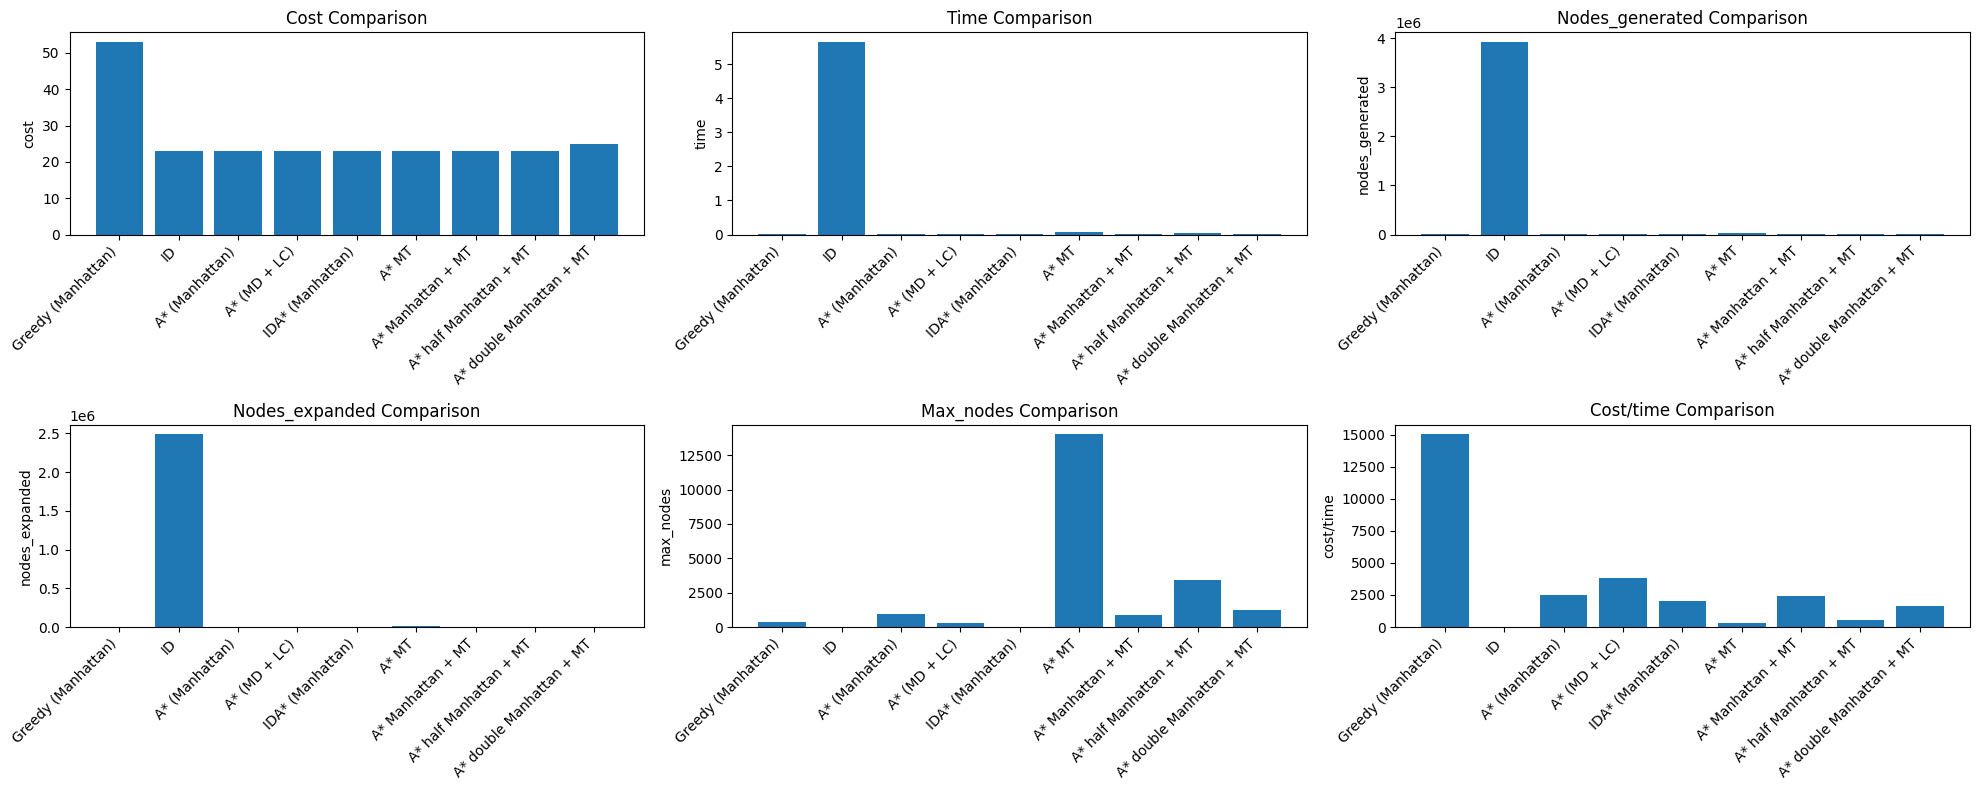

In [8]:
size = 3  # 3x3 puzzle

initial_state_matrix = [
    [4, 2, 1],
    [0, 3, 7],
    [6, 5, 8]
]

end_state_matrix = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

# Convert the matrix into a one-dimensional list
initial_state = [num for row in initial_state_matrix for num in row]
# Convert the matrix into a one-dimensional list
end_state = [num for row in end_state_matrix for num in row]

# Run all of the algorithms and show the results as a table
results = {}
if isSolvable(initial_state, end_state):
    # Calling the function that runs all the algorithms
    results = run_all_algorithms(initial_state, end_state, size, 40)
    show_results(results)
    plot_algorithm_comparison(results)
else:
    print("The puzzle is not solvable.")

#### Comparison of four algorithms over 100 3x3 executions:

The well known A* MD+LC versus the implemented A* MD+MT, A* half MD+MT, A* double MD+MT.

In [9]:
# Setup
size = 3  # Puzzle size
num_iterations = 100  # Number of random puzzles
end_state = generate_spiral_state(size)

heuristic1 = 'A* (MD + LC)'
heuristic2 = 'A* Manhattan + MT'
heuristic3 = 'A* half Manhattan + MT'
heuristic4 = 'A* double Manhattan + MT'

# Structures to store the results
heuristic1_costs = []
heuristic1_expanded = []
heuristic1_times = []
heuristic2_costs = []
heuristic2_expanded = []
heuristic2_times = []
heuristic3_costs = []
heuristic3_expanded = []
heuristic3_times = []
heuristic4_costs = []
heuristic4_expanded = []
heuristic4_times = []
cost_differences = []
time_differences = []
node_differences = []

print(f"Initiating experiment with {num_iterations} puzzles of size {size}x{size}")
print("Goal state:")
visualize_state(end_state)

# Main loop of the experiment
for i in range(num_iterations):
    # Generating random initial state
    initial_state = generate_random_state(size, end_state)

    if not isSolvable(initial_state, end_state):
        print(f"\nPuzzle {i+1}: There is no solution, generating one more...")
        continue

    print(f"\rProcessing puzzle {i+1}/{num_iterations}", end='', flush=True)

    # HEURISTIC 1 ('A* (MD + LC)')

    result = run_algorithm(heuristic1, initial_state, end_state, size)

    heuristic1_result = result[heuristic1]

    # HEURISTIC 2 ('A* Manhattan + MT')

    result = run_algorithm(heuristic2, initial_state, end_state, size)

    heuristic2_result = result[heuristic2]

    # HEURISTIC 3 ('A* half Manhattan + MT')

    result = run_algorithm(heuristic3, initial_state, end_state, size)

    heuristic3_result = result[heuristic3]

    # HEURISTIC 4 ('A* double Manhattan + MT')

    result = run_algorithm(heuristic4, initial_state, end_state, size)

    heuristic4_result = result[heuristic4]
    
    # Saving the results

    heuristic1_costs.append(heuristic1_result['cost'])
    heuristic1_expanded.append(heuristic1_result['nodes_expanded'])
    heuristic1_times.append(heuristic1_result['time'])

    heuristic2_costs.append(heuristic2_result['cost'])
    heuristic2_expanded.append(heuristic2_result['nodes_expanded'])
    heuristic2_times.append(heuristic2_result['time'])

    heuristic3_costs.append(heuristic3_result['cost'])
    heuristic3_expanded.append(heuristic3_result['nodes_expanded'])
    heuristic3_times.append(heuristic3_result['time'])

    heuristic4_costs.append(heuristic4_result['cost'])
    heuristic4_expanded.append(heuristic4_result['nodes_expanded'])
    heuristic4_times.append(heuristic4_result['time'])

    cost_diff = heuristic2_result['cost'] - heuristic1_result['cost']
    cost_differences.append(cost_diff)

    time_diff = heuristic2_result['time'] - heuristic1_result['time']
    time_differences.append(time_diff)

    node_diff = heuristic2_result['nodes_expanded'] - heuristic1_result['nodes_expanded']
    node_differences.append(node_diff)


print("\nExperiment completed!")

Initiating experiment with 100 puzzles of size 3x3
Goal state:
 1  2  3
 8     4
 7  6  5
Processing puzzle 100/100
Experiment completed!


In [10]:
# Computing statistics
stats = {
    'A* (MD+LC)': {
        'coste_min': min(heuristic1_costs),  # Minimum cost
        'coste_max': max(heuristic1_costs),  # Maximum cost
        'coste_medio': statistics.mean(heuristic1_costs),  # Mean cost
        'expandidos_medio': statistics.mean(heuristic1_expanded),  # Mean number of nodes expanded
        'tiempo_medio': statistics.mean(heuristic1_times)  # Mean time
    },
    'A* (MD+MT)': {
        'coste_min': min(heuristic2_costs),  # Minimum cost
        'coste_max': max(heuristic2_costs),  # Maximum cost
        'coste_medio': statistics.mean(heuristic2_costs),  # Mean cost
        'expandidos_medio': statistics.mean(heuristic2_expanded),  # Mean number of nodes expanded
        'tiempo_medio': statistics.mean(heuristic2_times)  # Mean time
    },
    'A* half MD+MT': {
        'coste_min': min(heuristic3_costs),  # Minimum cost
        'coste_max': max(heuristic3_costs),  # Maximum cost
        'coste_medio': statistics.mean(heuristic3_costs),  # Mean cost
        'expandidos_medio': statistics.mean(heuristic3_expanded),  # Mean number of nodes expanded
        'tiempo_medio': statistics.mean(heuristic3_times)  # Mean time
    },
    'A* (double MD+MT)': {
        'coste_min': min(heuristic4_costs),  # Minimum cost
        'coste_max': max(heuristic4_costs),  # Maximum cost
        'coste_medio': statistics.mean(heuristic4_costs),  # Mean cost
        'expandidos_medio': statistics.mean(heuristic4_expanded),  # Mean number of nodes expanded
        'tiempo_medio': statistics.mean(heuristic4_times)  # Mean time
    }
}

print("Statistics for A* (MD+LC):")
print(f"Cost - Min: {stats['A* (MD+LC)']['coste_min']}, Max: {stats['A* (MD+LC)']['coste_max']}, Mean: {stats['A* (MD+LC)']['coste_medio']:.2f}")
print(f"Nodes expanded (mean): {stats['A* (MD+LC)']['expandidos_medio']:.2f}")
print(f"Mean time: {stats['A* (MD+LC)']['tiempo_medio']:.3f}s\n")

print("Statistics for A* (MD+MT):")
print(f"Cost - Min: {stats['A* (MD+MT)']['coste_min']}, Max: {stats['A* (MD+MT)']['coste_max']}, Mean: {stats['A* (MD+MT)']['coste_medio']:.2f}")
print(f"Nodes expanded (mean): {stats['A* (MD+MT)']['expandidos_medio']:.2f}")
print(f"Mean time: {stats['A* (MD+MT)']['tiempo_medio']:.3f}s\n")

print("Statistics for A* half MD+MT:")
print(f"Cost - Min: {stats['A* half MD+MT']['coste_min']}, Max: {stats['A* half MD+MT']['coste_max']}, Mean: {stats['A* half MD+MT']['coste_medio']:.2f}")
print(f"Nodes expanded (mean): {stats['A* half MD+MT']['expandidos_medio']:.2f}")
print(f"Mean time: {stats['A* half MD+MT']['tiempo_medio']:.3f}s\n")

print("Statistics for A* double MD+MT:")
print(f"Cost - Min: {stats['A* (double MD+MT)']['coste_min']}, Max: {stats['A* (double MD+MT)']['coste_max']}, Mean: {stats['A* (double MD+MT)']['coste_medio']:.2f}")
print(f"Nodes expanded (mean): {stats['A* (double MD+MT)']['expandidos_medio']:.2f}")
print(f"Mean time: {stats['A* (double MD+MT)']['tiempo_medio']:.3f}s\n")

# print("Differences (A*(double MD+MT) - A*(MD+LC)):")
# print(f"Minimum cost: {min(cost_differences)}")
# print(f"Maximum cost: {max(cost_differences)}")
# print(f"Mean cost: {statistics.mean(cost_differences):.2f}")
# print(f"Mean nodes expanded: {statistics.mean(node_differences):.2f}")
# print(f"Mean time: {statistics.mean(time_differences):.3f}s")

Statistics for A* (MD+LC):
Cost - Min: 11, Max: 30, Mean: 22.03
Nodes expanded (mean): 375.79
Mean time: 0.014s

Statistics for A* (MD+MT):
Cost - Min: 11, Max: 32, Mean: 22.53
Nodes expanded (mean): 733.55
Mean time: 0.014s

Statistics for A* half MD+MT:
Cost - Min: 11, Max: 30, Mean: 22.03
Nodes expanded (mean): 3210.59
Mean time: 0.065s

Statistics for A* double MD+MT:
Cost - Min: 11, Max: 36, Mean: 25.79
Nodes expanded (mean): 452.11
Mean time: 0.009s



#### **Questions**:

Interpreting the results obtained about the three heuristics implemented A* (Manhattan + MT), A* (half Manhattan + MT) and A* (double Manhattan + MT):

1. Regarding the heuristic **A\* (Manhattan + MT)**, is it admissible? How do you know that? Is it more or less efficient in time and memory than the well known A* (Manhattan + LC)?
1. Regarding the heuristic **A\* (half Manhattan + MT)**, is it admissible? How do you know that? Is it more or less efficient in time and memory than the implemented A* (Manhattan + MT)?
1. Regarding the heuristic **A\* (double Manhattan + MT)**, is it admissible? How do you know that? Is it more or less efficient in time and memory than the implemented A* (Manhattan + MT)?
1. From these three implemented heuristics, which one would you choose if it were important to always obtain an optimal solution? Why?
1. From these three implemented heuristics, which one would you choose if it were important to minimize time cost and space cost, even at the expense of not always finding an optimal solution? Why?

**Answers**:

1. Answer: the heuristic A*(Manhattan + MT) is not admissible, as its approximation surpasses the real cost to arrive to the final state. Let's consider an example, an state similar to the final one where 2 is placed in the position of the null tile(0), such that the cost to arrive to the final state is only 1 (we have to move the 2 only one position up, thus cost = 1). By using this heuristic, the approximate cost would be 2 (1+1 = 2), which is greater than the real cost. Thus, it is not admissible. This heuristic is less efficient than the A*(MD + LC), as it takes slightly more time and memory to arrive to the solution. Moreover, A*(MD + MT) generates, expands and stores more nodes than A*(MD+LC).



2. Answer: the heuristic A*(half Manhattan + MT) seems to be admissible, as it reduces by half the estimation of the MD+MT approximation. In the previous example, where we are at 1 movement from the final state, this heuristic would return a correct distance (1+1 / 2 = 1), coinciding with the real cost to arrive to that final solution. In comparison with the previously implemented A*(MD+MT), this new heuristic costs more time (0.065 s compared to 0.014 s) and takes much more nodes(3210 nodes vs 733 nodes before) to generate to arrive to the final solution. Therefore, although it ensures that the solution obtained will be optimal, both the temporal and spatial costs are greater than the previous heuristic.



3. Answer: the heuristic A*(double MD+MT) is not admissible, as it doubles the approximation and surpasses the real costs. Similarly to the first one, if we where at just 1 movement from the last state, this heursitic would return (1+1)x2 = 4 as the approx. cost, which is greater than 1. This heursitic costs sligthly more movements than the previous ones (25 vs 22 previously), although it is faster than A*(MD+MT), lasting 0.009s  rather than 0.014 s. It seems to be also less expensive, memory-wise, generating and storing less nodes.



4. Answer: if we needed to find always the most optimal solution, A*(half MD+MT) would be the correct choice as, despite its temporal and memory costs, it ensures that the solution found will always be the shortest / most optimal solution, due to its admissible heuristic



5. Answer: if our goal was to save space and time, A*(double MD+MT) would be the best option, due to its low temporal and memory costs in comparison with the other two implemented heuristics, despite not ensuring the optimal solution always.